castle_entrance: 0 0
courtyard: 0 1
training_grounds: 1 1
armory: 2 1
barracks: 1 2
great_hall: -1 1
dining_hall: -2 1
kitchen: -3 1
throne_room: -1 2


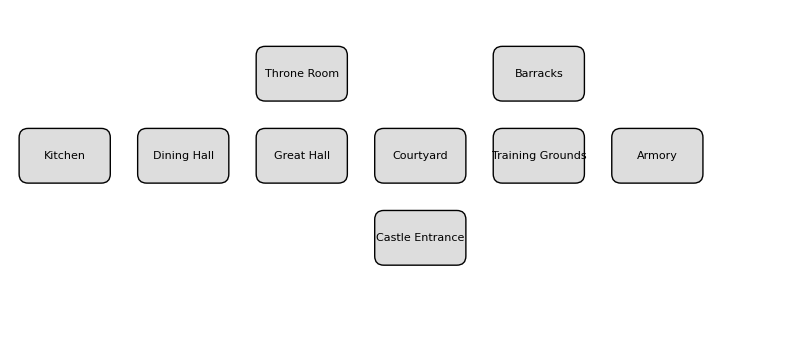

In [34]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import yaml

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(-4.5, 4)
ax.set_ylim(-1.0, 2.5)
ax.axis('off')
ax.set_aspect('equal')

size_x = 1
size_y = 0.6

mul_x = 1.3
mul_y = 1.5

def draw_connection(a: tuple[float, float], b: tuple[float, float]):
    draw_offset_x_a = mul_x * size_x * a[0]
    draw_offset_y_a = mul_y * size_y * a[1]

    draw_offset_x_b = mul_x * size_x * b[0]
    draw_offset_y_b = mul_y * size_y * b[1]

    ax.plot([draw_offset_x_a, draw_offset_x_b], [draw_offset_y_a, draw_offset_y_b], 'k-')

def draw_room(x, y, text):
    draw_offset_x = mul_x * size_x * x
    draw_offset_y = mul_y * size_y * y

    margin_x = 0.1

    margin_y = 0.1

    draw_size_x = size_x - 2 * margin_x
    draw_size_y = size_y - 2 * margin_y

    lower_left_x = -size_x / 2 + margin_x
    lower_left_y = -size_y / 2 + margin_y

    rect = FancyBboxPatch(
        (lower_left_x + draw_offset_x, lower_left_y + draw_offset_y),  
        draw_size_x,
        draw_size_y,
        boxstyle='round,pad=0.1',
        facecolor='#ddd',
        edgecolor='black',
        zorder=2
    )
    
    ax.add_patch(rect)

    ax.text(draw_offset_x, draw_offset_y, text, 
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=8)

def load_room_defs():
    with open('../src/Game/data/room-defs.yml', 'r') as f:
        return yaml.load(f, Loader=yaml.FullLoader)

room_defs = load_room_defs()

completed_rooms = []

def traverse(room, pos: tuple[float, float], depth: int):
    if (room['id'] in completed_rooms):
        return
    
    if depth > 10:
        return
    
    print(f"{room['id']}: {pos[0]} {pos[1]}")

    draw_room(pos[0], pos[1], room['name'])

    completed_rooms.append(room['id'])

    next_pos = (pos[0], pos[1])

    for exit in room['exits']:
        if exit['direction'] == 'n':
            next_pos = (pos[0], pos[1] + 1)
        elif exit['direction'] == 's':
            next_pos = (pos[0], pos[1] - 1)
        elif exit['direction'] == 'e':
            next_pos = (pos[0] + 1, pos[1])
        elif exit['direction'] == 'w':
            next_pos = (pos[0] - 1, pos[1])

        next_room = next((room for room in room_defs if room['id'] == exit['destinationId']), None)

        if next_room is not None:
            traverse(next_room, next_pos, depth + 1)

traverse(room_defs[0], (0, 0), 0)
plt.show()

